<a href="https://colab.research.google.com/github/federico2018lc/InnovacionDatosProyectoFinal/blob/main/analisis_datos_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracción, preparación y transformación de datos.
 Para comenzar el analisis, importamos las librerias a utilizar y cargamos los archivos csv para luego realizar etl



In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('default') #agregamos esto porque hubo algun cambio de estilo

Lectura del los archivos 'customer_data.csv' y 'sales_data'

Para trabajar con los archivo.csv tendremos que importar la libreria Pandas y aplicar el método pd.read_csv("nombre.csv") a los archivos ya cargados al colab(margen izquierdo- icono de carpeta)

Esto creara un dataframe, una estructura de datos similar a una tabla con filas y columnas.


In [253]:
clientes=pd.read_csv( 'customer_data.csv')
ventas= pd.read_csv('sales_data.csv')
print(f"Dimensiones de clientes:{clientes.shape} ")
print(f"Dimensiones de ventas:{ventas.shape} ")

Dimensiones de clientes:(99457, 4) 
Dimensiones de ventas:(99457, 7) 


Presentamos el encabezado con algunos datos de cada tabla.

Columnas Clientes: `customer_id; gender; age; payment_method`

Columnas Ventas: `invoice_no customer_id  category  quantity    price invoice_date shopping_mall`

Reconemos la columna en común `customer_id `


In [254]:
print("Tabla Clientes")
print(clientes.head())
print("Tabla Ventas")
print(ventas.head())

Tabla Clientes
  customer_id  gender   age payment_method
0     C241288  Female  28.0    Credit Card
1     C111565    Male  21.0     Debit Card
2     C266599    Male  20.0           Cash
3     C988172  Female  66.0    Credit Card
4     C189076  Female  53.0           Cash
Tabla Ventas
  invoice_no customer_id  category  quantity    price invoice_date  \
0    I138884     C241288  Clothing         5  1500.40   05-08-2022   
1    I317333     C111565     Shoes         3  1800.51   12-12-2021   
2    I127801     C266599  Clothing         1   300.08   09-11-2021   
3    I173702     C988172     Shoes         5  3000.85   16-05-2021   
4    I337046     C189076     Books         4    60.60   24-10-2021   

    shopping_mall  
0          Kanyon  
1  Forum Istanbul  
2       Metrocity  
3    Metropol AVM  
4          Kanyon  


# comparación de columnas customer_id

Verificamos si las columnas customer_id tienen los mismo datos.

In [255]:
set(clientes['customer_id']) == set(ventas['customer_id'])
#las columnas contienen los mismo datos

True

In [256]:
clientes['customer_id'].value_counts()
#Por cada id un cliente.

,count
customer_id,
C273973,1
C137631,1
C776199,1
C363191,1
C180055,1
...,...
C657758,1
C189076,1
C988172,1


In [257]:
ventas['customer_id'].value_counts().sort_values(ascending=False)
#Total de 99457 clientes hicieron 1 compra cada uno.

,count
customer_id,
C111565,1
C235554,1
C131810,1
C223470,1
C119287,1
...,...
C265057,1
C180055,1
C363191,1


# `.info` dataframe


In [258]:
print(clientes.info())
print(ventas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99457 non-null  object 
 1   gender          99457 non-null  object 
 2   age             99338 non-null  float64
 3   payment_method  99457 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   invoice_no     99457 non-null  object 
 1   customer_id    99457 non-null  object 
 2   category       99457 non-null  object 
 3   quantity       99457 non-null  int64  
 4   price          99457 non-null  float64
 5   invoice_date   99457 non-null  object 
 6   shopping_mall  99457 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.3+ MB

con las sentencias anteriores, pudimos observar que tipo de datos contiene cada data set `( objects: innvoice no, customerid, gender, payment method, category, invoice date, shopping mall)`, `float (age, price)` e `int (quantity)`. Observamos que tienen en comun la columna `customer_id`

# Transformación - Agrupación de clientes y ventas - Método Merge

Dado que tienen los mismo datos en la columna customer_id, procedemos con unir los dataframe con el método pd.merge con el how='inner' que agrupa los datos de ambas tablas.

In [259]:
df= pd.merge(ventas, clientes, on='customer_id', how='inner')

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   category        99457 non-null  object 
 3   quantity        99457 non-null  int64  
 4   price           99457 non-null  float64
 5   invoice_date    99457 non-null  object 
 6   shopping_mall   99457 non-null  object 
 7   gender          99457 non-null  object 
 8   age             99338 non-null  float64
 9   payment_method  99457 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 7.6+ MB


# Busqueda datos faltantes

Ya que solamente falta 119 datos de la columna age, sobre un total de 99 mil registro, tomamos la decisión de eliminar esas filas.

In [261]:
df.isnull().sum()

,0
invoice_no,0
customer_id,0
category,0
quantity,0
price,0
invoice_date,0
shopping_mall,0
gender,0
age,119
payment_method,0


In [262]:
df.dropna (subset=['age'], inplace=True) #elimino los 119 registros vacios, ya que esa cantidad no afecta la muestra de 99338 valores


In [263]:
df.isnull().sum()

,0
invoice_no,0
customer_id,0
category,0
quantity,0
price,0
invoice_date,0
shopping_mall,0
gender,0
age,0
payment_method,0


# Cambio de tipo
Cambiamos el tipo de age, de float a int, ya que las edades son valores enteros.

In [264]:
df['age'] = df['age'].astype(int)  # convierto a enteros la edad
print(f"age type: {df['age'].dtype}")

age type: int64


# Busqueda de duplicados

`np.int64(0)` indica que no hay datos duplicados

In [265]:
df.duplicated().sum()

np.int64(0)

# Estudio por Columnas:
Las columnas que no analizaremos: `'invoice_no', 'customer_id',`

Columnas con datos numéricos: `'quantity', 'price','age',`

Columnas con datos categoricos: `'category', 'invoice_date', 'shopping_mall', 'gender', 'payment_method'`

# Estadística básica sobre Datos Numéricos. Método `.describe()`


In [266]:
df.describe().round(2)

,quantity,price,age
count,99338.00,99338.00,99338.00
mean,3.00,689.30,43.43
std,1.41,941.37,14.99
min,1.00,5.23,18.00
25%,2.00,45.45,30.00
50%,3.00,203.30,43.00
75%,4.00,1200.32,56.00
max,5.00,5250.00,69.00


# Conteo datos categoricos: ( Object )

In [267]:
columnus = ['gender', 'payment_method', 'category','quantity', 'shopping_mall', ]

for col in columnus:
    print(f"Columna: {col}")
    conteo = df[col].value_counts()
    porcentaje = df[col].value_counts(normalize=True) * 100
    resultado = pd.DataFrame({'Cantidad': conteo, 'Porcentaje (%)': porcentaje.round(2)})
    print(resultado)
    print('------------------')

Columna: gender
        Cantidad  Porcentaje (%)
gender                          
Female     59412           59.81
Male       39926           40.19
------------------
Columna: payment_method
                Cantidad  Porcentaje (%)
payment_method                          
Cash               44397           44.69
Credit Card        34898           35.13
Debit Card         20043           20.18
------------------
Columna: category
                 Cantidad  Porcentaje (%)
category                                 
Clothing            34445           34.67
Cosmetics           15084           15.18
Food & Beverage     14761           14.86
Toys                10071           10.14
Shoes               10015           10.08
Technology           4995            5.03
Souvenir             4991            5.02
Books                4976            5.01
------------------
Columna: quantity
          Cantidad  Porcentaje (%)
quantity                          
3            20128           20.26
5    

# Rango de fechas


In [268]:
ventas['invoice_date'].min(), ventas['invoice_date'].max()

('01-01-2021', '31-12-2022')

#Gráficos

# Género `gender`

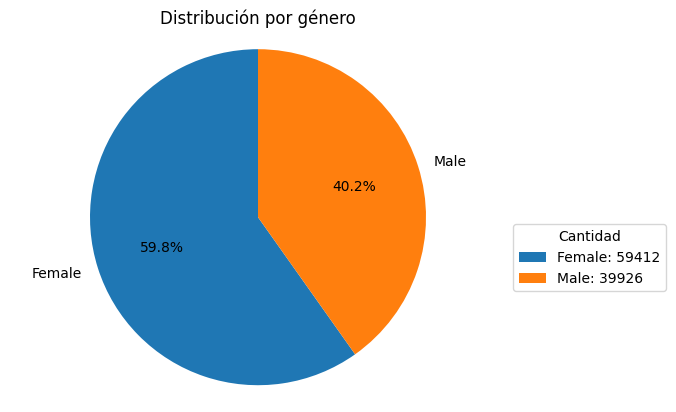

In [269]:
# Contar los valores de la columna
valores = df['gender'].value_counts()

# Crear el gráfico circular
plt.pie(valores, labels=valores.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución por género')
plt.axis('equal')  # Hace que el círculo no se vea ovalado

# Crear texto para la leyenda con cantidades
leyenda = [f'{categoria}: {cantidad}' for categoria, cantidad in zip(valores.index, valores)]

# Agregar la leyenda (cuadro)
plt.legend(leyenda, title="Cantidad", loc="best", bbox_to_anchor=(1, 0.5))

plt.show()

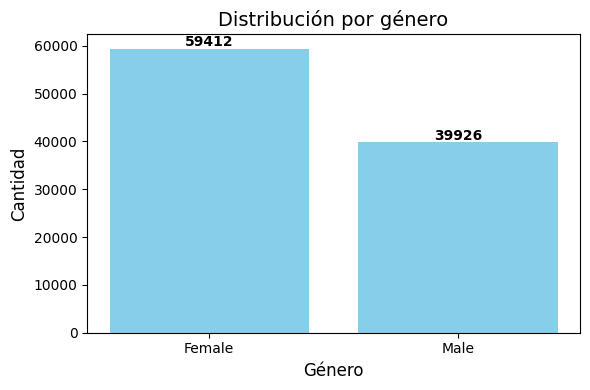

In [270]:

# Contar los valores
valores = df['gender'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(6,4))
plt.bar(valores.index, valores.values, color='skyblue')

# Título y etiquetas
plt.title('Distribución por género', fontsize=14)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

# Mostrar valores arriba de cada barra
for i, v in enumerate(valores.values):
    plt.text(i, v + (v*0.01), str(v), ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

/tmp/ipython-input-4027107392.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=valores, x='Género', y='Cantidad', palette='pastel')


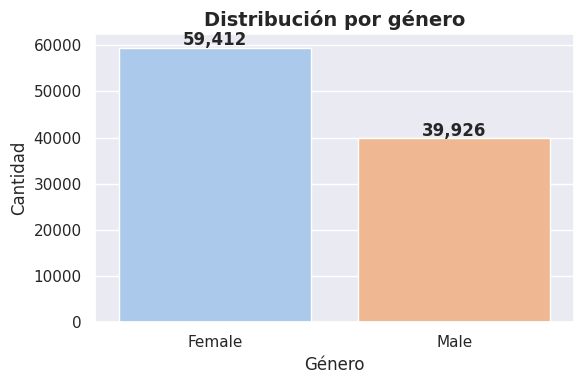

In [271]:
# Datos
valores = df['gender'].value_counts().reset_index()
valores.columns = ['Género', 'Cantidad']

# Estilo de Seaborn
sns.set_theme(style="darkgrid")

plt.figure(figsize=(6,4))
ax = sns.barplot(data=valores, x='Género', y='Cantidad', palette='pastel')

# Título y etiquetas
plt.title('Distribución por género', fontsize=14, fontweight='bold')
plt.xlabel('Género', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

# Etiquetas sobre las barras
for i, v in enumerate(valores['Cantidad']):
    ax.text(i, v + (v*0.01), f'{v:,}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


# Edad `age`

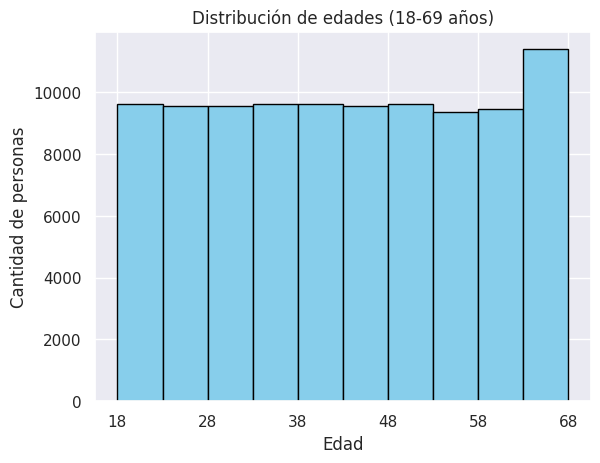

In [272]:


plt.hist(df['age'].dropna(), bins=range(18, 69, 5), color='skyblue', edgecolor='black')
plt.title('Distribución de edades (18-69 años)')
plt.xlabel('Edad')
plt.ylabel('Cantidad de personas')
plt.xticks(range(18, 69, 10))
plt.show()

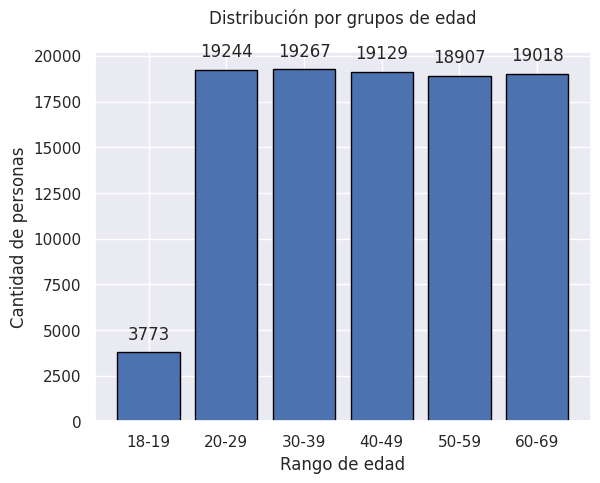

In [273]:

# Definir los intervalos
bins = [18, 19, 29, 39, 49, 59, 69]
labels = ['18-19', '20-29', '30-39', '40-49', '50-59', '60-69']

# Crear la serie auxiliar
grupo_edades = pd.cut(df['age'], bins=bins, labels=labels, right=True, include_lowest=True)

conteo = grupo_edades.value_counts().sort_index()

plt.bar(conteo.index, conteo.values, edgecolor='black')

plt.title('Distribución por grupos de edad', pad=20)
plt.xlabel('Rango de edad')
plt.ylabel('Cantidad de personas')

# Agregar etiquetas arriba de cada barra
for i, valor in enumerate(conteo.values):
    plt.text(i, valor + 500, str(valor), ha='center', va='bottom')

plt.show()

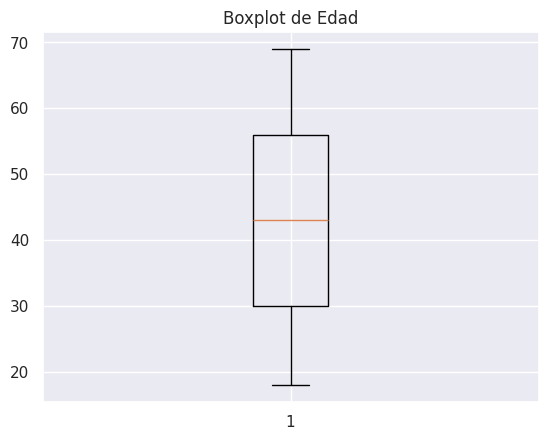

In [274]:
plt.boxplot(df['age'])
plt.title('Boxplot de Edad')
plt.show()

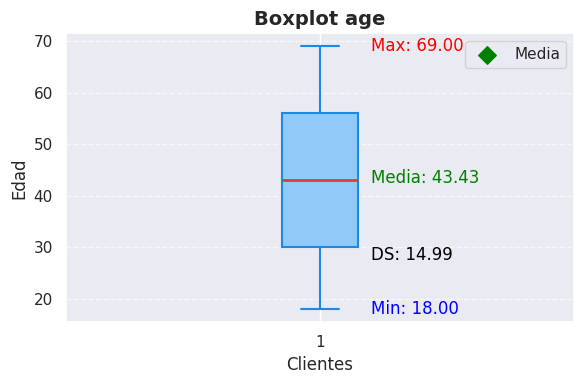

In [275]:

# 📌 Calcular estadísticas
media = df['age'].mean()
std = df['age'].std()
min_val = df['age'].min()
max_val = df['age'].max()

plt.figure(figsize=(6,4))

# 📦 Boxplot personalizado
caja = plt.boxplot(
    df['age'],
    patch_artist=True,
    boxprops=dict(facecolor="#90CAF9", color="#1E88E5", linewidth=1.5),
    whiskerprops=dict(color="#1E88E5", linewidth=1.5),
    capprops=dict(color="#1E88E5", linewidth=1.5),
    medianprops=dict(color="#E53935", linewidth=2),
    flierprops=dict(marker='o', color="#E53935", alpha=0.5)
)

# 📍 Línea de la media
plt.scatter(1, media, color='green', s=80, marker='D', label='Media')

# 📊 Agregar anotaciones de estadísticas
plt.text(1.1, media, f"Media: {media:.2f}", va='center', color='green')
plt.text(1.1, media - std, f"DS: {std:.2f}", va='center', color='black')
plt.text(1.1, min_val, f"Min: {min_val:.2f}", va='center', color='blue')
plt.text(1.1, max_val, f"Max: {max_val:.2f}", va='center', color='red')

# 🎨 Personalización
plt.title('Boxplot age', fontsize=14, fontweight='bold')
plt.xlabel('Clientes')
plt.ylabel('Edad')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


# Método de pago `payment_method`

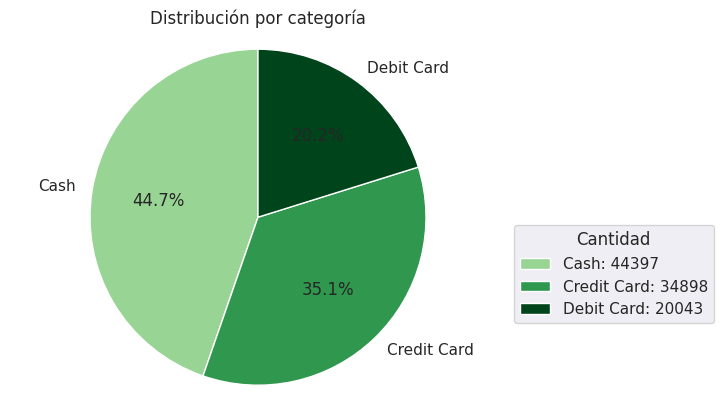

In [276]:
import numpy as np

# Contar los valores de la columna
valores = df['payment_method'].value_counts()
# Paleta continua desde azul a verde
paleta = plt.cm.Greens(np.linspace(0.4, 1, len(valores)))

plt.pie(
    valores,
    labels=valores.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=paleta
)
# Crear texto para la leyenda con cantidades
leyenda = [f'{categoria}: {cantidad}' for categoria, cantidad in zip(valores.index, valores)]

# Agregar la leyenda (cuadro)
plt.legend(leyenda, title="Cantidad", loc="best", bbox_to_anchor=(1, 0.5))

plt.title('Distribución por categoría')
plt.axis('equal')
plt.show()

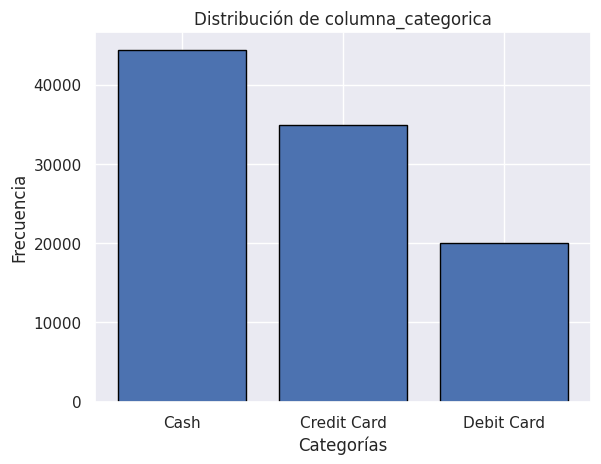

In [277]:
# Contar cuántas veces aparece cada categoría
valores = df['payment_method'].value_counts()

# Crear el gráfico de barras
plt.bar(valores.index, valores.values, edgecolor='black')
plt.title('Distribución de columna_categorica')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')

plt.show()

/tmp/ipython-input-4088891684.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=valores, x='Metodo de pago', y='Cantidad', palette='pastel')


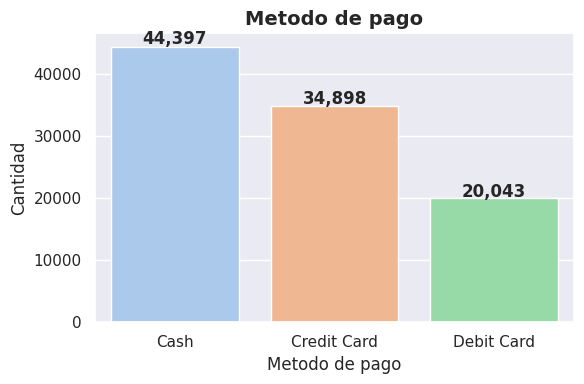

In [278]:
# Datos
valores = df['payment_method'].value_counts().reset_index()
valores.columns = ['Metodo de pago', 'Cantidad']

# Estilo de Seaborn
sns.set_theme(style="darkgrid")

plt.figure(figsize=(6,4))
ax = sns.barplot(data=valores, x='Metodo de pago', y='Cantidad', palette='pastel')

# Título y etiquetas
plt.title('Metodo de pago', fontsize=14, fontweight='bold')
plt.xlabel('Metodo de pago', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

# Etiquetas sobre las barras
for i, v in enumerate(valores['Cantidad']):
    ax.text(i, v + (v*0.01), f'{v:,}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


# Categorias de compras `category`

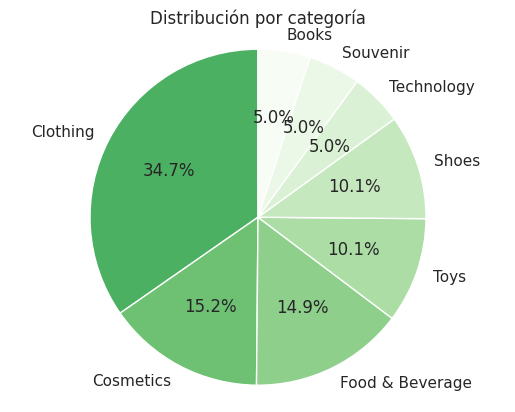

In [279]:

# Contar los valores de la columna
valores = df['category'].value_counts()
# Paleta continua desde azul a verde
paleta = plt.cm.Greens_r(np.linspace(0.4, 1, len(valores)))

plt.pie(
    valores,
    labels=valores.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=paleta
)
plt.title('Distribución por categoría')
plt.axis('equal')
plt.show()

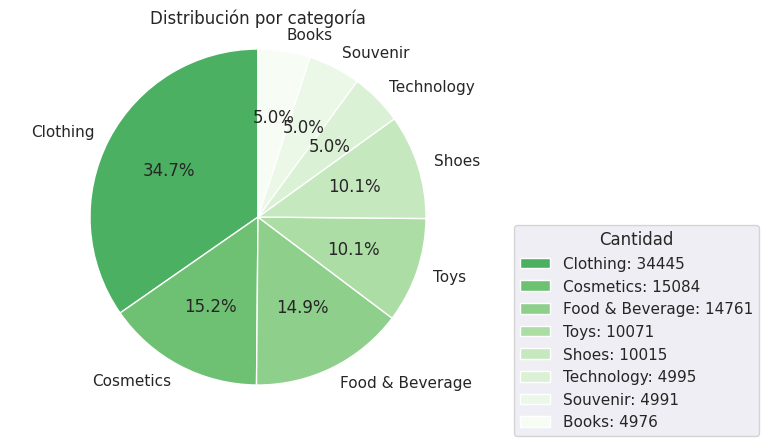

In [280]:
# Contar los valores de la columna
valores = df['category'].value_counts()
# Paleta continua desde azul a verde
paleta = plt.cm.Greens_r(np.linspace(0.4, 1, len(valores)))


plt.pie(
    valores,
    labels=valores.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=paleta
)

# Crear texto para la leyenda con cantidades
leyenda = [f'{categoria}: {cantidad}' for categoria, cantidad in zip(valores.index, valores)]
# Agregar la leyenda (cuadro)
plt.legend(leyenda, title="Cantidad", loc="best", bbox_to_anchor=(1, 0.5))

plt.title('Distribución por categoría')
plt.axis('equal')
plt.show()


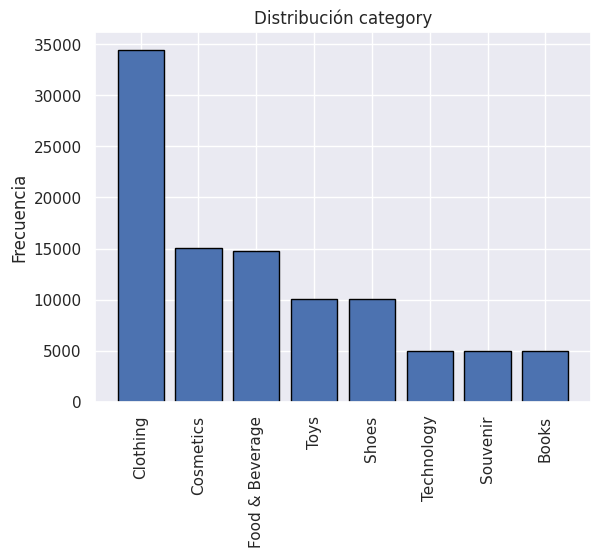

In [281]:
# Contar cuántas veces aparece cada categoría
valores = df['category'].value_counts()

# Crear el gráfico de barras
plt.bar(valores.index, valores.values, edgecolor='black')
plt.title('Distribución category')
#plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # gira etiquetas si son largas
plt.show()

# QUANTY

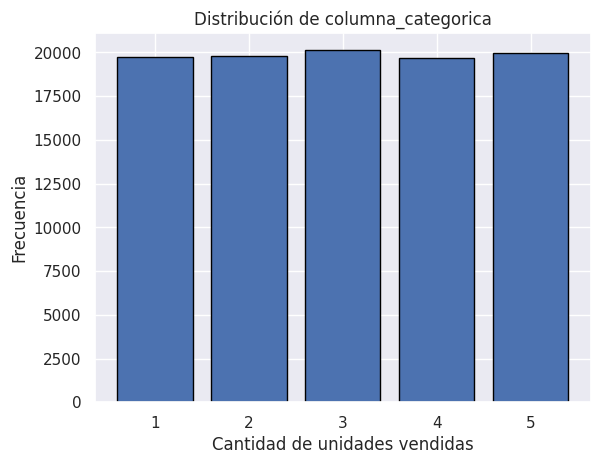

In [282]:
valores = df['quantity'].value_counts()

# Crear el gráfico de barras
plt.bar(valores.index, valores.values, edgecolor='black')
plt.title('Distribución de columna_categorica')
plt.xlabel('Cantidad de unidades vendidas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)  # gira etiquetas si son largas
plt.show()

# Shopping `'shopping_mall'`

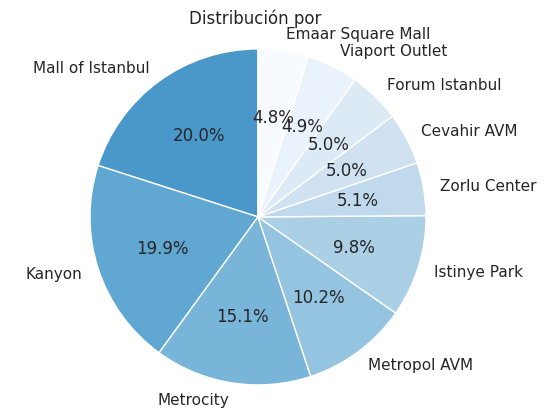

In [283]:

# Contar los valores de la columna
valores = df['shopping_mall'].value_counts()
# Paleta continua desde azul a verde
paleta = plt.cm.Blues_r(np.linspace(0.4, 1, len(valores)))

plt.pie(
    valores,
    labels=valores.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=paleta
)
plt.title('Distribución por ')
plt.axis('equal')
plt.show()

# Precios `price`

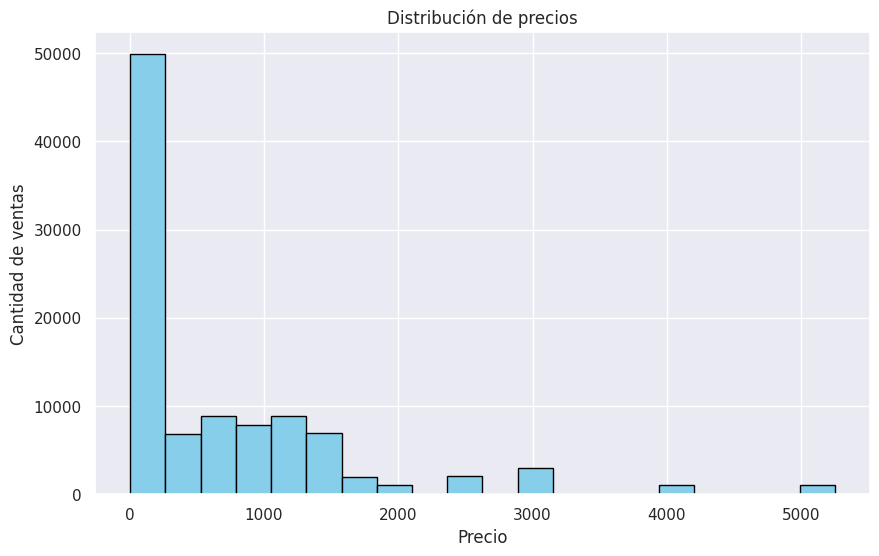

In [284]:
plt.figure(figsize=(10,6))
plt.hist(df['price'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de precios')
plt.xlabel('Precio')
plt.ylabel('Cantidad de ventas')
plt.show()

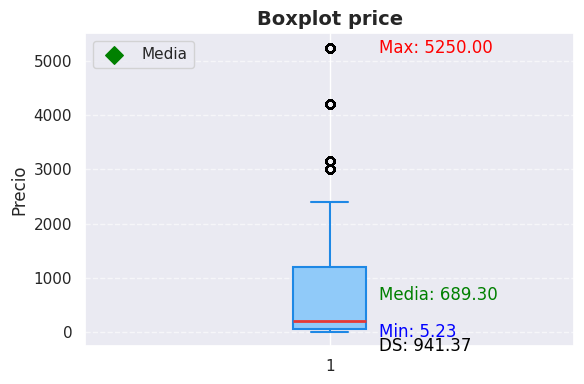

In [285]:
# 📌 Calcular estadísticas
media = df['price'].mean()
std = df['price'].std()
min_val = df['price'].min()
max_val = df['price'].max()

plt.figure(figsize=(6,4))

# 📦 Boxplot personalizado
caja = plt.boxplot(
    df['price'],
    patch_artist=True,
    boxprops=dict(facecolor="#90CAF9", color="#1E88E5", linewidth=1.5),
    whiskerprops=dict(color="#1E88E5", linewidth=1.5),
    capprops=dict(color="#1E88E5", linewidth=1.5),
    medianprops=dict(color="#E53935", linewidth=2),
    flierprops=dict(marker='o', color="#E53935", alpha=0.5)
)

# 📍 Línea de la media
plt.scatter(1, media, color='green', s=80, marker='D', label='Media')

# 📊 Agregar anotaciones de estadísticas
plt.text(1.1, media, f"Media: {media:.2f}", va='center', color='green')
plt.text(1.1, media - std, f"DS: {std:.2f}", va='center', color='black')
plt.text(1.1, min_val, f"Min: {min_val:.2f}", va='center', color='blue')
plt.text(1.1, max_val, f"Max: {max_val:.2f}", va='center', color='red')

# 🎨 Personalización
plt.title('Boxplot price', fontsize=14, fontweight='bold')
plt.ylabel('Precio')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

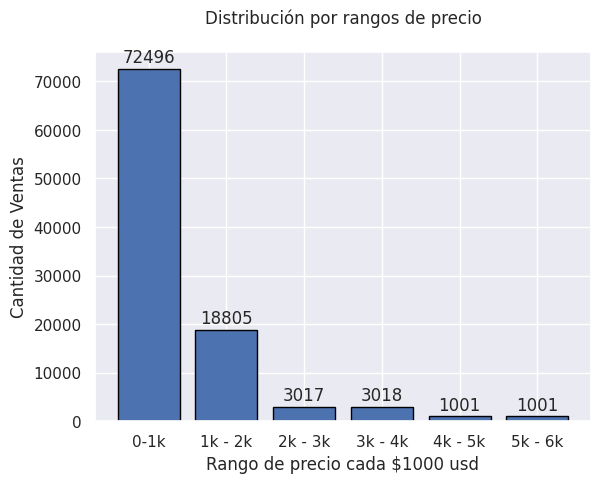

In [286]:
# Definir los intervalos
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000]
labels = ['0-1k', '1k - 2k', '2k - 3k', '3k - 4k', '4k - 5k', '5k - 6k']

# Crear la serie auxiliar
grupo_precio = pd.cut(df['price'], bins=bins, labels=labels, right=True, include_lowest=True)

conteo = grupo_precio.value_counts().sort_index()

plt.bar(conteo.index, conteo.values, edgecolor='black')

plt.title('Distribución por rangos de precio', pad=20)
plt.xlabel('Rango de precio cada $1000 usd')
plt.ylabel('Cantidad de Ventas')

# Agregar etiquetas arriba de cada barra
for i, valor in enumerate(conteo.values):
    plt.text(i, valor + 500, str(valor), ha='center', va='bottom')

plt.show()

In [287]:
df_filtrado = df[(df['price'] >= 0) & (df['price'] <= 1000)]
# 📌 Calcular estadísticas
media = df_filtrado['price'].mean()
print(media)

236.6387851743544


<>:31: SyntaxWarning: invalid escape sequence '\$'
<>:31: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-2166396579.py:31: SyntaxWarning: invalid escape sequence '\$'
  plt.title('Boxplot precio desde \$0 a \$1000', fontsize=14, fontweight='bold')


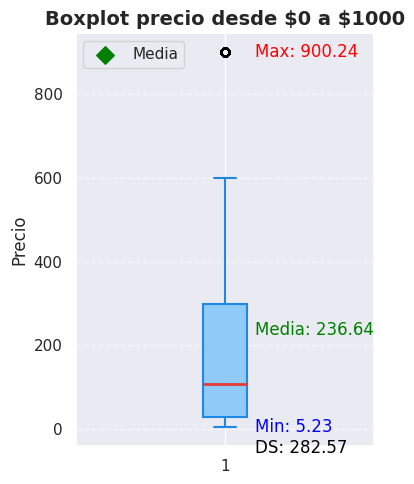

In [288]:
df_filtrado = df[(df['price'] >= 0) & (df['price'] <= 1000)]
# 📌 Calcular estadísticas
media = df_filtrado['price'].mean()
std = df_filtrado['price'].std()
min_val = df_filtrado['price'].min()
max_val = df_filtrado['price'].max()

plt.figure(figsize=(4,5))

# 📦 Boxplot personalizado
caja = plt.boxplot(
    df_filtrado['price'],
    patch_artist=True,
    boxprops=dict(facecolor="#90CAF9", color="#1E88E5", linewidth=1.5),
    whiskerprops=dict(color="#1E88E5", linewidth=1.5),
    capprops=dict(color="#1E88E5", linewidth=1.5),
    medianprops=dict(color="#E53935", linewidth=2),
    flierprops=dict(marker='o', color="#E53935", alpha=0.5)
)

# 📍 Línea de la media
plt.scatter(1, media, color='green', s=80, marker='D', label='Media')

# 📊 Agregar anotaciones de estadísticas
plt.text(1.1, media, f"Media: {media:.2f}", va='center', color='green')
plt.text(1.1, media - std, f"DS: {std:.2f}", va='center', color='black')
plt.text(1.1, min_val, f"Min: {min_val:.2f}", va='center', color='blue')
plt.text(1.1, max_val, f"Max: {max_val:.2f}", va='center', color='red')

# 🎨 Personalización
plt.title('Boxplot precio desde \$0 a \$1000', fontsize=14, fontweight='bold')
plt.ylabel('Precio')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

<>:31: SyntaxWarning: invalid escape sequence '\$'
<>:31: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-207092249.py:31: SyntaxWarning: invalid escape sequence '\$'
  plt.title('Boxplot precio desde \$1000 a \$2000', fontsize=14, fontweight='bold')


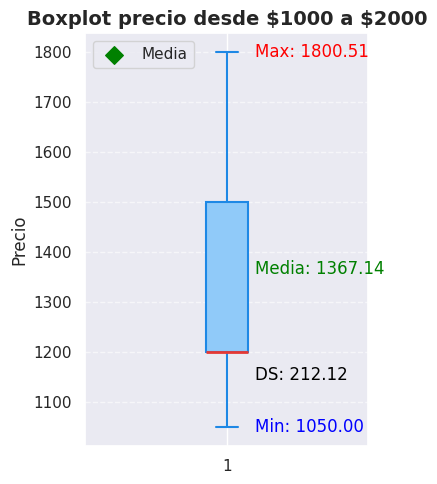

In [289]:
df_filtrado = df[(df['price'] > 1000) & (df['price'] <= 2000)]
# 📌 Calcular estadísticas
media = df_filtrado['price'].mean()
std = df_filtrado['price'].std()
min_val = df_filtrado['price'].min()
max_val = df_filtrado['price'].max()

plt.figure(figsize=(4,5))

# 📦 Boxplot personalizado
caja = plt.boxplot(
    df_filtrado['price'],
    patch_artist=True,
    boxprops=dict(facecolor="#90CAF9", color="#1E88E5", linewidth=1.5),
    whiskerprops=dict(color="#1E88E5", linewidth=1.5),
    capprops=dict(color="#1E88E5", linewidth=1.5),
    medianprops=dict(color="#E53935", linewidth=2),
    flierprops=dict(marker='o', color="#E53935", alpha=0.5)
)

# 📍 Línea de la media
plt.scatter(1, media, color='green', s=80, marker='D', label='Media')

# 📊 Agregar anotaciones de estadísticas
plt.text(1.1, media, f"Media: {media:.2f}", va='center', color='green')
plt.text(1.1, media - std, f"DS: {std:.2f}", va='center', color='black')
plt.text(1.1, min_val, f"Min: {min_val:.2f}", va='center', color='blue')
plt.text(1.1, max_val, f"Max: {max_val:.2f}", va='center', color='red')

# 🎨 Personalización
plt.title('Boxplot precio desde \$1000 a \$2000', fontsize=14, fontweight='bold')
plt.ylabel('Precio')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

<>:31: SyntaxWarning: invalid escape sequence '\$'
<>:31: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-717212317.py:31: SyntaxWarning: invalid escape sequence '\$'
  plt.title('Boxplot precio desde \$2000 a \$3000', fontsize=14, fontweight='bold')


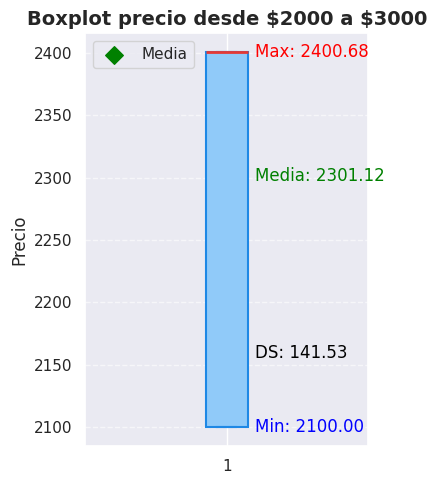

In [290]:
df_filtrado = df[(df['price'] > 2000) & (df['price'] <= 3000)]
# 📌 Calcular estadísticas
media = df_filtrado['price'].mean()
std = df_filtrado['price'].std()
min_val = df_filtrado['price'].min()
max_val = df_filtrado['price'].max()

plt.figure(figsize=(4,5))

# 📦 Boxplot personalizado
caja = plt.boxplot(
    df_filtrado['price'],
    patch_artist=True,
    boxprops=dict(facecolor="#90CAF9", color="#1E88E5", linewidth=1.5),
    whiskerprops=dict(color="#1E88E5", linewidth=1.5),
    capprops=dict(color="#1E88E5", linewidth=1.5),
    medianprops=dict(color="#E53935", linewidth=2),
    flierprops=dict(marker='o', color="#E53935", alpha=0.5)
)

# 📍 Línea de la media
plt.scatter(1, media, color='green', s=80, marker='D', label='Media')

# 📊 Agregar anotaciones de estadísticas
plt.text(1.1, media, f"Media: {media:.2f}", va='center', color='green')
plt.text(1.1, media - std, f"DS: {std:.2f}", va='center', color='black')
plt.text(1.1, min_val, f"Min: {min_val:.2f}", va='center', color='blue')
plt.text(1.1, max_val, f"Max: {max_val:.2f}", va='center', color='red')

# 🎨 Personalización
plt.title('Boxplot precio desde \$2000 a \$3000', fontsize=14, fontweight='bold')
plt.ylabel('Precio')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

<>:31: SyntaxWarning: invalid escape sequence '\$'
<>:31: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-260102915.py:31: SyntaxWarning: invalid escape sequence '\$'
  plt.title('Boxplot precio desde \$3000 a \$4000', fontsize=14, fontweight='bold')


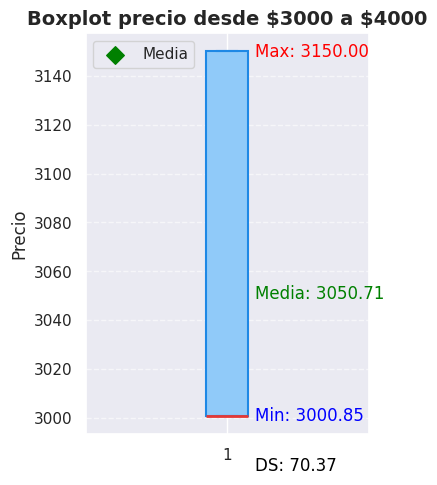

In [291]:
df_filtrado = df[(df['price'] > 3000) & (df['price'] <= 4000)]
# 📌 Calcular estadísticas
media = df_filtrado['price'].mean()
std = df_filtrado['price'].std()
min_val = df_filtrado['price'].min()
max_val = df_filtrado['price'].max()

plt.figure(figsize=(4,5))

# 📦 Boxplot personalizado
caja = plt.boxplot(
    df_filtrado['price'],
    patch_artist=True,
    boxprops=dict(facecolor="#90CAF9", color="#1E88E5", linewidth=1.5),
    whiskerprops=dict(color="#1E88E5", linewidth=1.5),
    capprops=dict(color="#1E88E5", linewidth=1.5),
    medianprops=dict(color="#E53935", linewidth=2),
    flierprops=dict(marker='o', color="#E53935", alpha=0.5)
)

# 📍 Línea de la media
plt.scatter(1, media, color='green', s=80, marker='D', label='Media')

# 📊 Agregar anotaciones de estadísticas
plt.text(1.1, media, f"Media: {media:.2f}", va='center', color='green')
plt.text(1.1, media - std, f"DS: {std:.2f}", va='center', color='black')
plt.text(1.1, min_val, f"Min: {min_val:.2f}", va='center', color='blue')
plt.text(1.1, max_val, f"Max: {max_val:.2f}", va='center', color='red')

# 🎨 Personalización
plt.title('Boxplot precio desde \$3000 a \$4000', fontsize=14, fontweight='bold')
plt.ylabel('Precio')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [292]:
df_filtrado['price'].value_counts()

,count
price,
3000.85,2009
3150.00,1009


In [293]:
df_filtrado['category'].value_counts()

,count
category,
Shoes,2009
Technology,1009


In [294]:
grupo_precio = pd.cut(df['price'], bins=bins, labels=labels, right=True, include_lowest=True)

porcentajes = grupo_precio.value_counts(normalize=True) * 100
print(porcentajes)

price
0-1k       72.979122
1k - 2k    18.930319
3k - 4k     3.038112
2k - 3k     3.037106
4k - 5k     1.007671
5k - 6k     1.007671
Name: proportion, dtype: float64


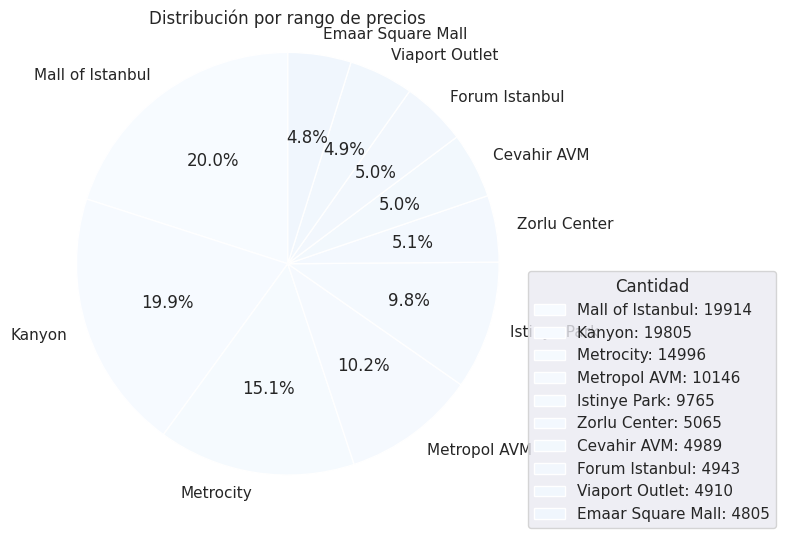

In [295]:
# Crear paleta de colores con el mismo número de categorías que valores
colores = plt.cm.Blues(range(len(valores)))

# Gráfico circular con paleta
plt.figure(figsize=(6, 6))
plt.pie(
    valores,
    labels=valores.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colores
)
plt.title('Distribución por rango de precios')
plt.axis('equal')

# Leyenda con cantidades
leyenda = [f'{categoria}: {cantidad}' for categoria, cantidad in zip(valores.index, valores)]
plt.legend(leyenda, title="Cantidad", loc="best", bbox_to_anchor=(1, 0.5))

plt.show()

# Gráficos conjuntos

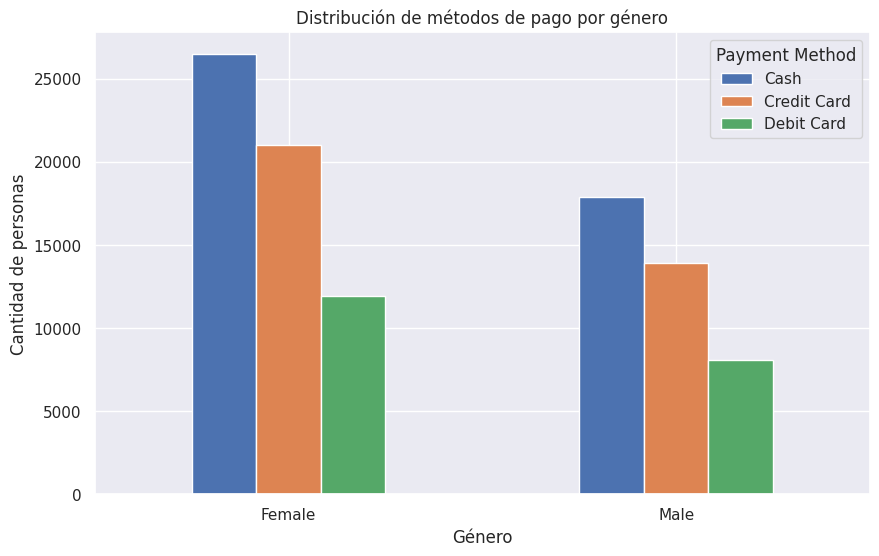

In [296]:
# Tabla cruzada: filas = gender, columnas = payment_method
tabla = pd.crosstab(df['gender'], df['payment_method'])

# Gráfico de barras agrupadas
tabla.plot(kind='bar', figsize=(10,6))
plt.title('Distribución de métodos de pago por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=0)
plt.legend(title='Payment Method')
plt.show()

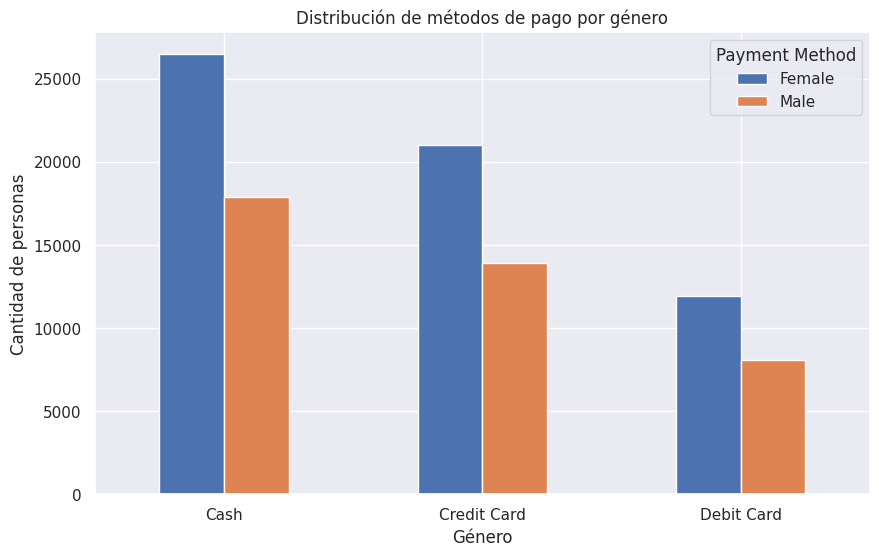

In [297]:
# Tabla cruzada: filas = gender, columnas = payment_method
tabla = pd.crosstab(df['payment_method'], df['gender'])

# Gráfico de barras agrupadas
tabla.plot(kind='bar', figsize=(10,6))
plt.title('Distribución de métodos de pago por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=0)
plt.legend(title='Payment Method')
plt.show()

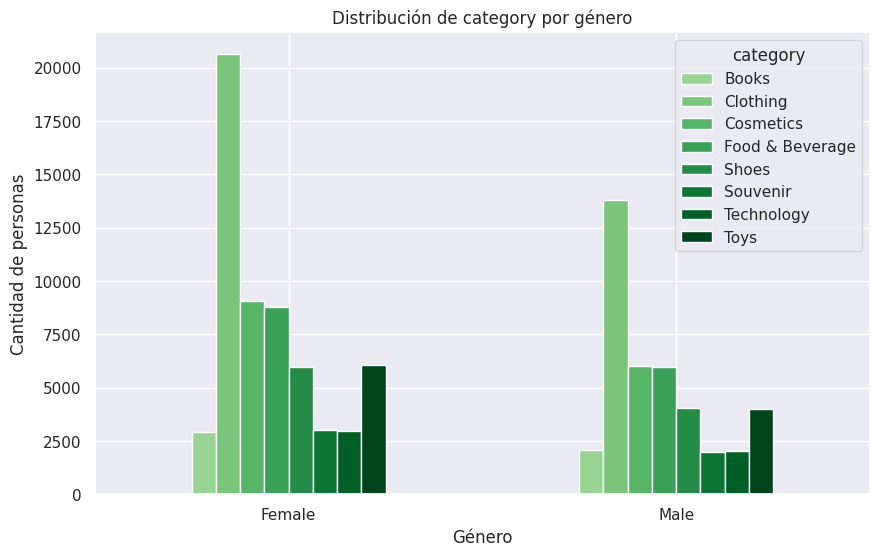

In [298]:
# Tabla cruzada: filas = gender, columnas = payment_method
tabla = pd.crosstab(df['gender'], df['category'])

# Gráfico de barras agrupadas
paleta = plt.cm.Greens(np.linspace(0.4, 1, len(tabla.columns)))
tabla.plot(kind='bar', figsize=(10,6), color=paleta)
plt.title('Distribución de category por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=0)
plt.legend(title='category')

plt.show()

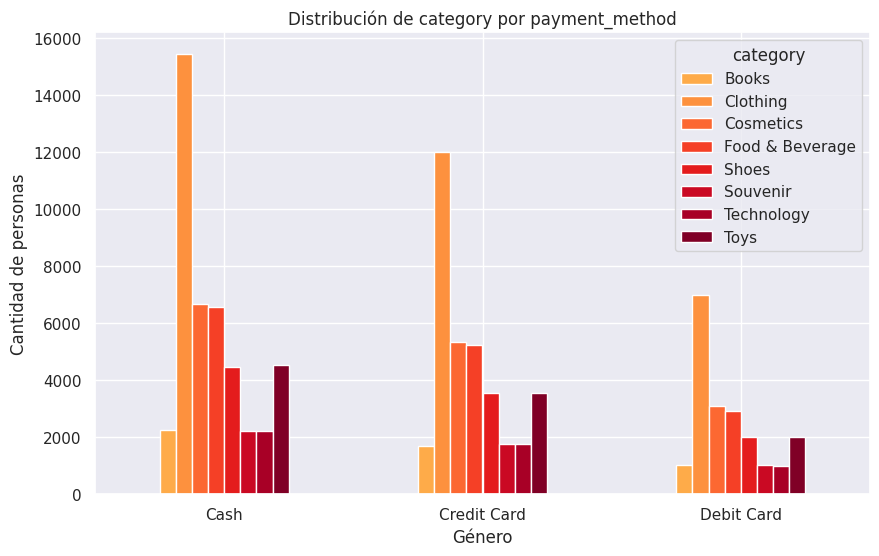

In [299]:
# Tabla cruzada: filas = gender, columnas = payment_method
tabla = pd.crosstab(df['payment_method'], df['category'])

# Gráfico de barras agrupadas
paleta = plt.cm.YlOrRd(np.linspace(0.4, 1, len(tabla.columns)))
tabla.plot(kind='bar', figsize=(10,6), color=paleta)
plt.title('Distribución de category por payment_method')
plt.xlabel('Género')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=0)
plt.legend(title='category')

plt.show()

<Axes: xlabel='payment_method', ylabel='gender'>

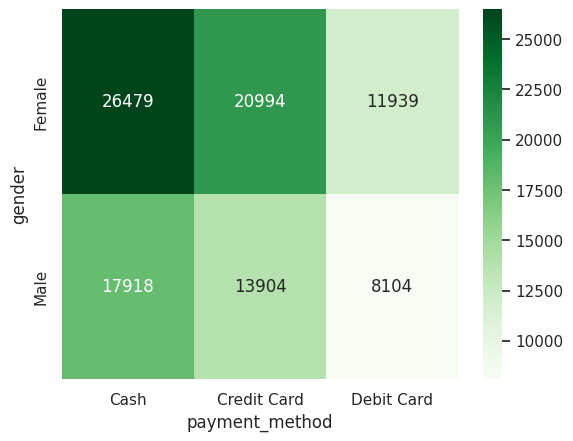

In [300]:
# Tabla cruzada: filas = gender, columnas = payment_method
tabla = pd.crosstab(df['gender'], df['payment_method'])
sns.heatmap(tabla, annot=True, fmt='d', cmap='Greens')

<Axes: xlabel='category', ylabel='gender'>

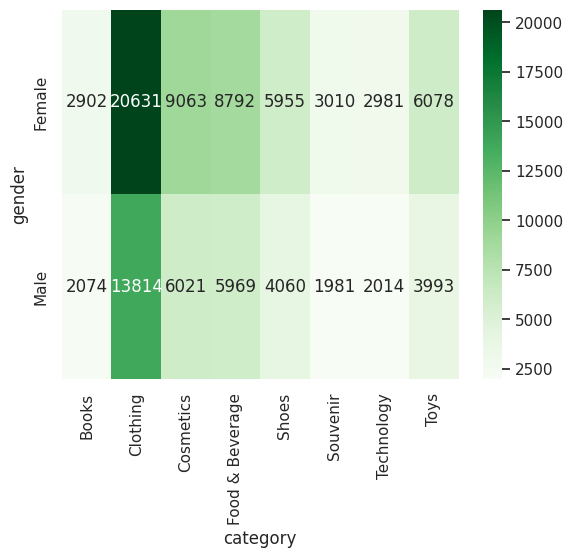

In [301]:
tabla = pd.crosstab(df['gender'], df['category'])
sns.heatmap(tabla, annot=True, fmt='d', cmap='Greens')

# Insight 1
1) metodos de pago

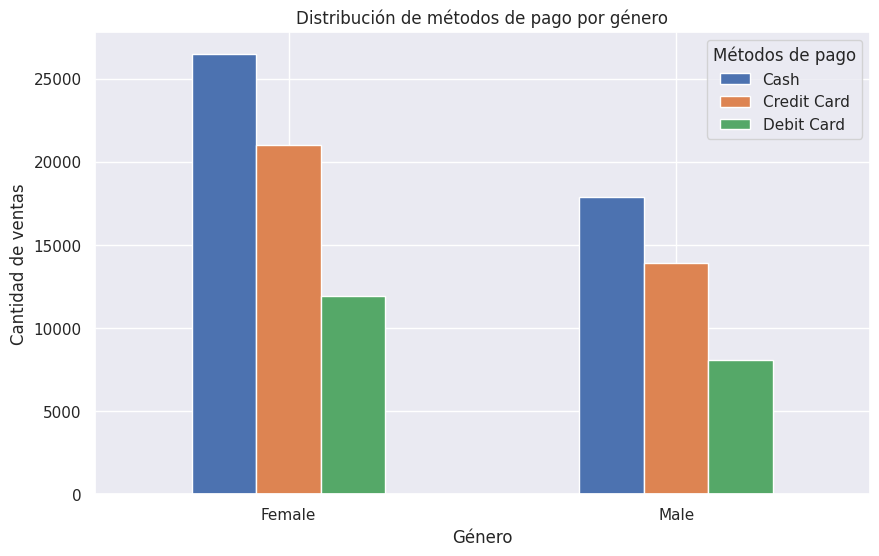

In [302]:
# Tabla cruzada: filas = gender, columnas = payment_method
tabla = pd.crosstab(df['gender'], df['payment_method'])

# Gráfico de barras agrupadas
tabla.plot(kind='bar', figsize=(10,6))
plt.title('Distribución de métodos de pago por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de ventas')
plt.xticks(rotation=0)
plt.legend(title='Métodos de pago')
plt.show()

<Axes: xlabel='payment_method', ylabel='gender'>

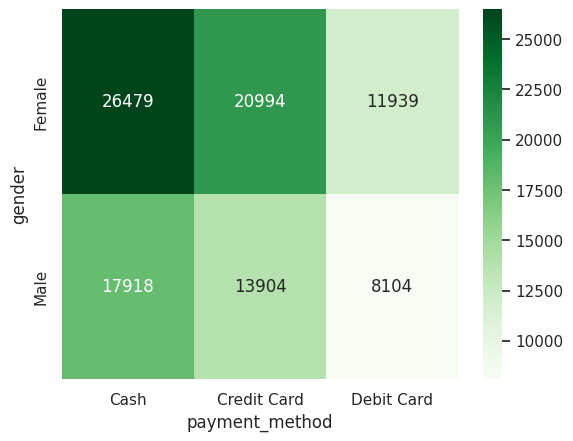

In [303]:
# Tabla cruzada: filas = gender, columnas = payment_method
tabla = pd.crosstab(df['gender'], df['payment_method'])
sns.heatmap(tabla, annot=True, fmt='d', cmap='Greens')

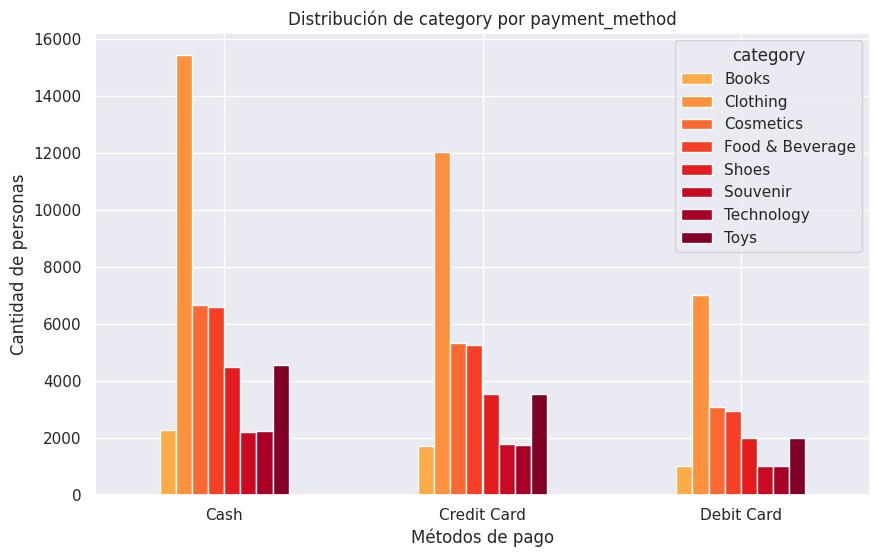

In [304]:
# Tabla cruzada: filas = gender, columnas = payment_method
tabla = pd.crosstab(df['payment_method'], df['category'])

# Gráfico de barras agrupadas
paleta = plt.cm.YlOrRd(np.linspace(0.4, 1, len(tabla.columns)))
tabla.plot(kind='bar', figsize=(10,6), color=paleta)
plt.title('Distribución de category por payment_method')
plt.xlabel('Métodos de pago')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=0)
plt.legend(title='category')

plt.show()

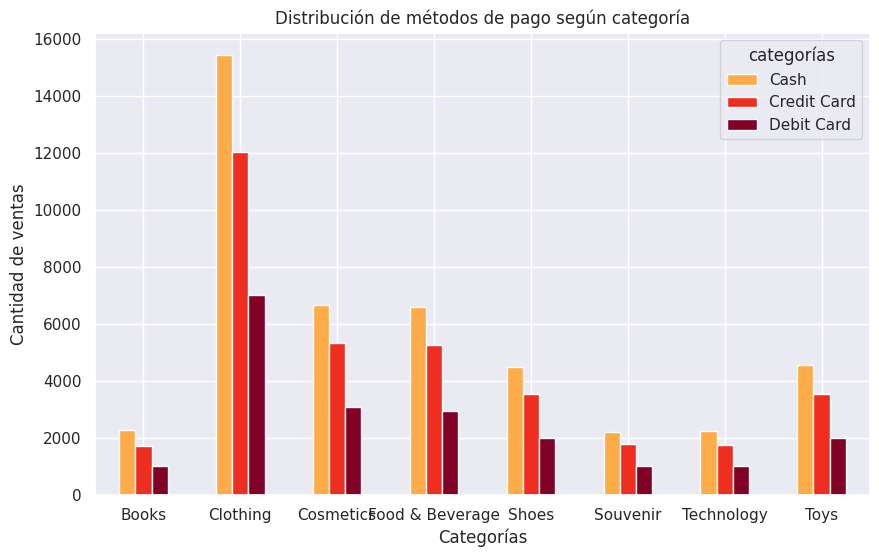

In [305]:
# Tabla cruzada: filas = gender, columnas = payment_method
tabla = pd.crosstab(df['category'], df['payment_method'],)

# Gráfico de barras agrupadas
paleta = plt.cm.YlOrRd(np.linspace(0.4, 1, len(tabla.columns)))
tabla.plot(kind='bar', figsize=(10,6), color=paleta)
plt.title('Distribución de métodos de pago según categoría')
plt.xlabel('Categorías')
plt.ylabel('Cantidad de ventas')
plt.xticks(rotation=0)
plt.legend(title='categorías')

plt.show()

# insight 2
Analizaremos diferentes relaciones respecto al género

/tmp/ipython-input-2710415346.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=valores, x='Género', y='Cantidad', palette='muted')


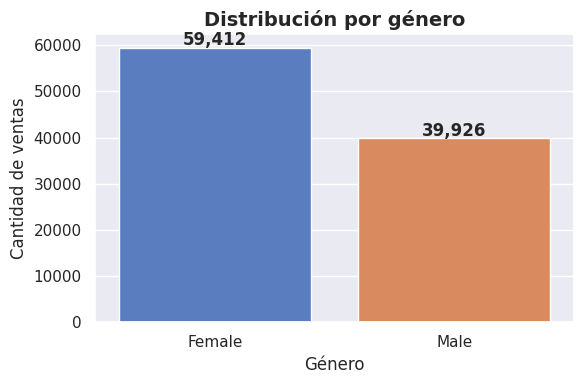

In [306]:
# Datos
valores = df['gender'].value_counts().reset_index()
valores.columns = ['Género', 'Cantidad']

# Estilo de Seaborn
sns.set_theme(style="darkgrid")

plt.figure(figsize=(6,4))
ax = sns.barplot(data=valores, x='Género', y='Cantidad', palette='muted')

# Título y etiquetas
plt.title('Distribución por género', fontsize=14, fontweight='bold')
plt.xlabel('Género', fontsize=12)
plt.ylabel('Cantidad de ventas', fontsize=12)

# Etiquetas sobre las barras
for i, v in enumerate(valores['Cantidad']):
    ax.text(i, v + (v*0.01), f'{v:,}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

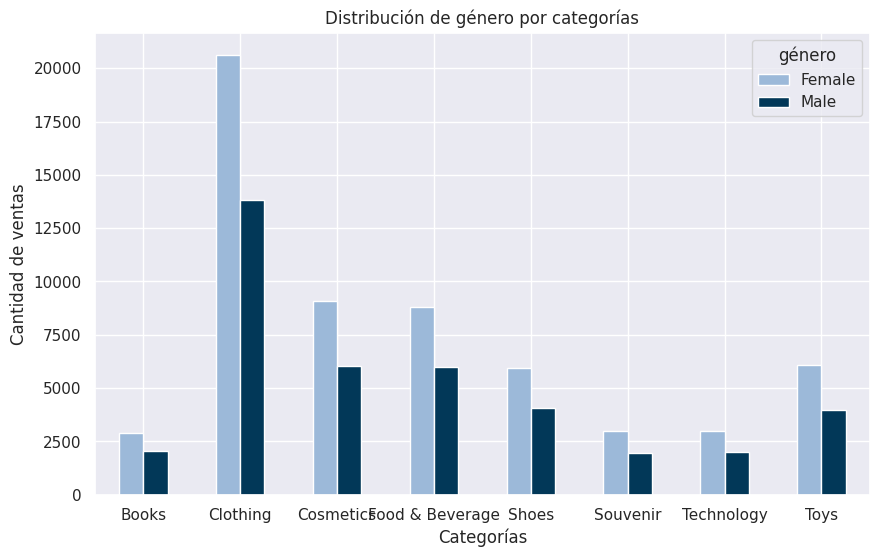

In [307]:
# Tabla cruzada: filas = gender, columnas = gender
tabla = pd.crosstab(df['category'], df['gender'],)

# Gráfico de barras agrupadas
paleta = plt.cm.PuBu(np.linspace(0.4, 1, len(tabla.columns)))
tabla.plot(kind='bar', figsize=(10,6), color=paleta)
plt.title('Distribución de género por categorías')
plt.xlabel('Categorías')
plt.ylabel('Cantidad de ventas')
plt.xticks(rotation=0)
plt.legend(title='género')

plt.show()

# insight 3
Rango etario de 25 a 35

**Mucha atención:** Dependiendo de como se haga la distribución puede parecer que los extremos tengas muchas ventas o pocas ventas.

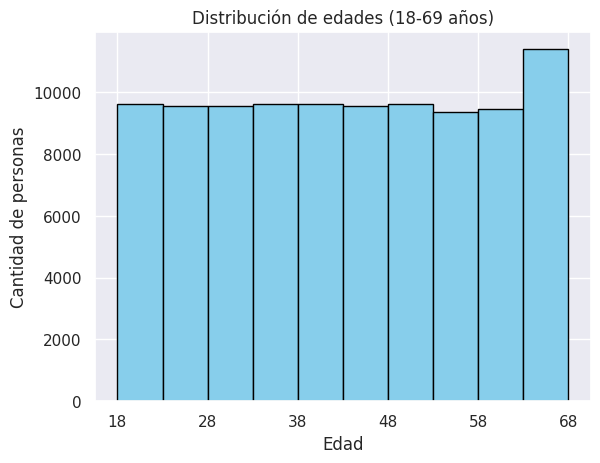

In [308]:
plt.hist(df['age'].dropna(), bins=range(18, 69, 5), color='skyblue', edgecolor='black')
plt.title('Distribución de edades (18-69 años)')
plt.xlabel('Edad')
plt.ylabel('Cantidad de personas')
plt.xticks(range(18, 69, 10))
plt.show()

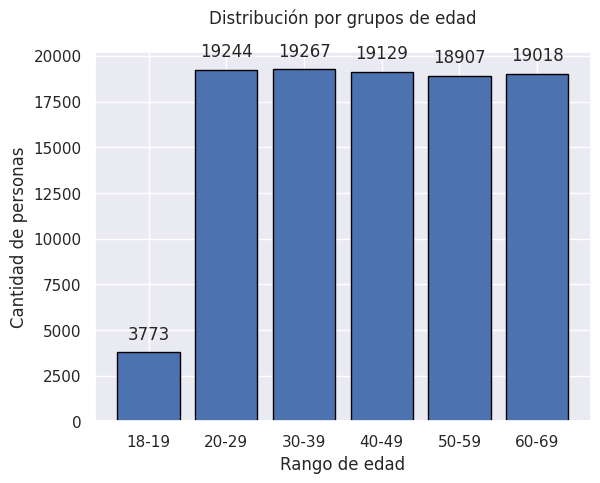

In [309]:
# Definir los intervalos
bins = [18, 19, 29, 39, 49, 59, 69]
labels = ['18-19', '20-29', '30-39', '40-49', '50-59', '60-69']

# Crear la serie auxiliar
grupo_edades = pd.cut(df['age'], bins=bins, labels=labels, right=True, include_lowest=True)

conteo = grupo_edades.value_counts().sort_index()

plt.bar(conteo.index, conteo.values, edgecolor='black')

plt.title('Distribución por grupos de edad', pad=20)
plt.xlabel('Rango de edad')
plt.ylabel('Cantidad de personas')

# Agregar etiquetas arriba de cada barra
for i, valor in enumerate(conteo.values):
    plt.text(i, valor + 500, str(valor), ha='center', va='bottom')

plt.show()

Teniendo en cuenta estos detalles prosigamos con el analisis


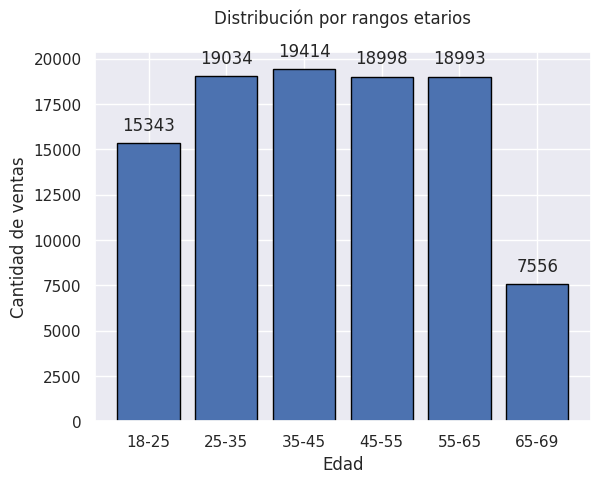

In [310]:
# Definir los intervalos
bins = [18, 25, 35, 45, 55, 65, 69]
labels = ['18-25', '25-35', '35-45', '45-55', '55-65', '65-69']

# Crear la serie auxiliar
grupo_edades = pd.cut(df['age'], bins=bins, labels=labels, right=True, include_lowest=True)

conteo = grupo_edades.value_counts().sort_index()

plt.bar(conteo.index, conteo.values, edgecolor='black')

plt.title('Distribución por rangos etarios', pad=20)
plt.xlabel('Edad')
plt.ylabel('Cantidad de ventas')

# Agregar etiquetas arriba de cada barra
for i, valor in enumerate(conteo.values):
    plt.text(i, valor + 500, str(valor), ha='center', va='bottom')

plt.show()

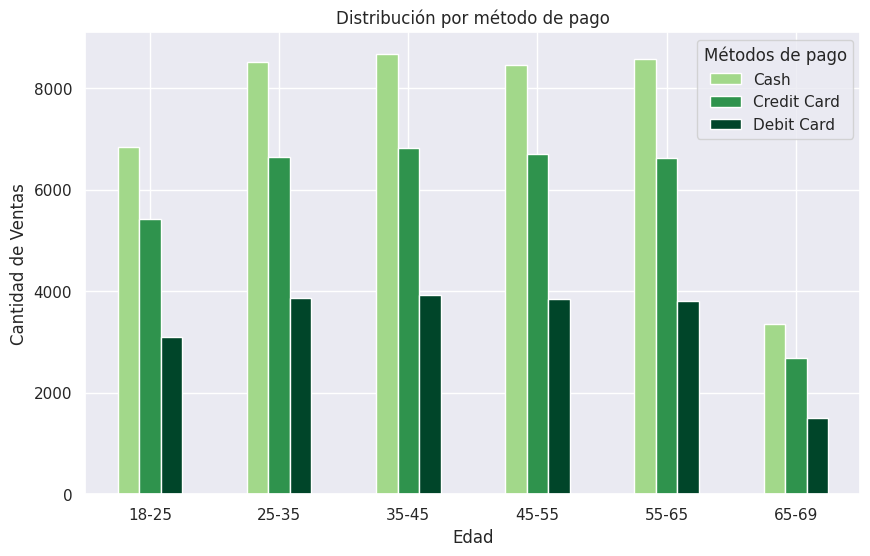

In [311]:
# Tabla cruzada: filas = gender, columnas = payment_method
tabla = pd.crosstab( grupo_edades,df['payment_method'],)

# Gráfico de barras agrupadas
paleta = plt.cm.YlGn(np.linspace(0.4, 1, len(tabla.columns)))
tabla.plot(kind='bar', figsize=(10,6), color=paleta)
plt.title('Distribución por método de pago')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=0)
plt.legend(title='Métodos de pago')

plt.show()

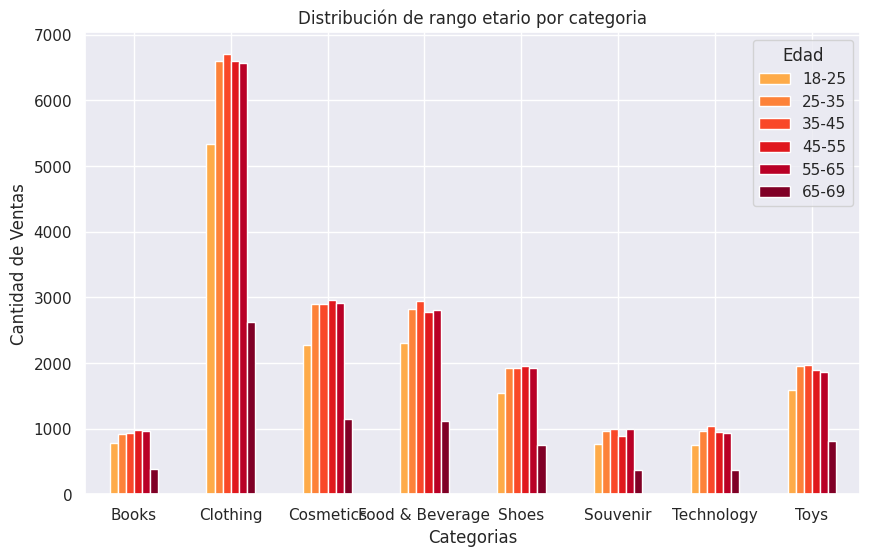

In [312]:
# Tabla cruzada: filas = gender, columnas = payment_method
tabla = pd.crosstab(df['category'], grupo_edades,)

# Gráfico de barras agrupadas
paleta = plt.cm.YlOrRd(np.linspace(0.4, 1, len(tabla.columns)))
tabla.plot(kind='bar', figsize=(10,6), color=paleta)
plt.title('Distribución de rango etario por categoria')
plt.xlabel('Categorias')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=0)
plt.legend(title='Edad')

plt.show()

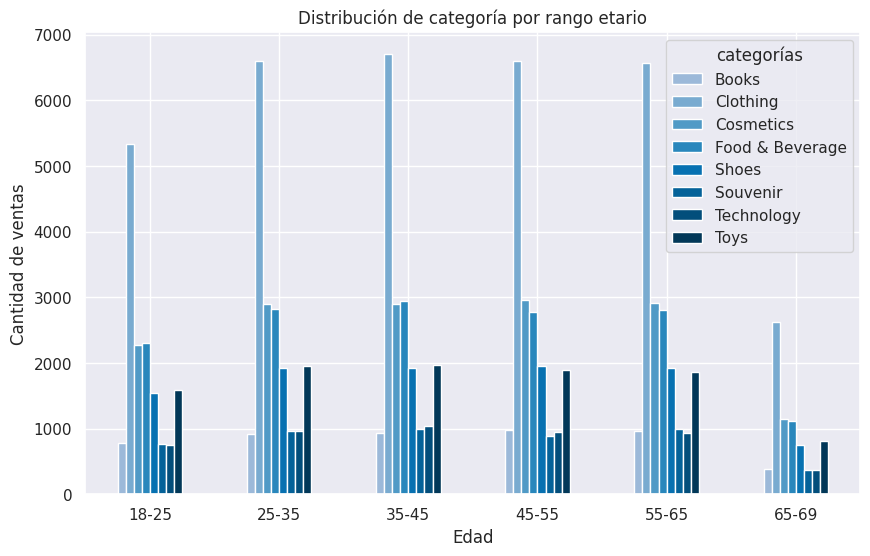

In [313]:
# Tabla cruzada: filas = gender, columnas = payment_method
tabla = pd.crosstab( grupo_edades,df['category'],)

# Gráfico de barras agrupadas
paleta = plt.cm.PuBu(np.linspace(0.4, 1, len(tabla.columns)))
tabla.plot(kind='bar', figsize=(10,6), color=paleta)
plt.title('Distribución de categoría por rango etario')
plt.xlabel('Edad')
plt.ylabel('Cantidad de ventas')
plt.xticks(rotation=0)
plt.legend(title='categorías')

plt.show()

# Preguntas orientadoras

1 Metodo de pago mas usado:  en est caso, se observa que es el Cash ( efectivo)

In [314]:
df['payment_method'].value_counts()

,count
payment_method,
Cash,44397
Credit Card,34898
Debit Card,20043


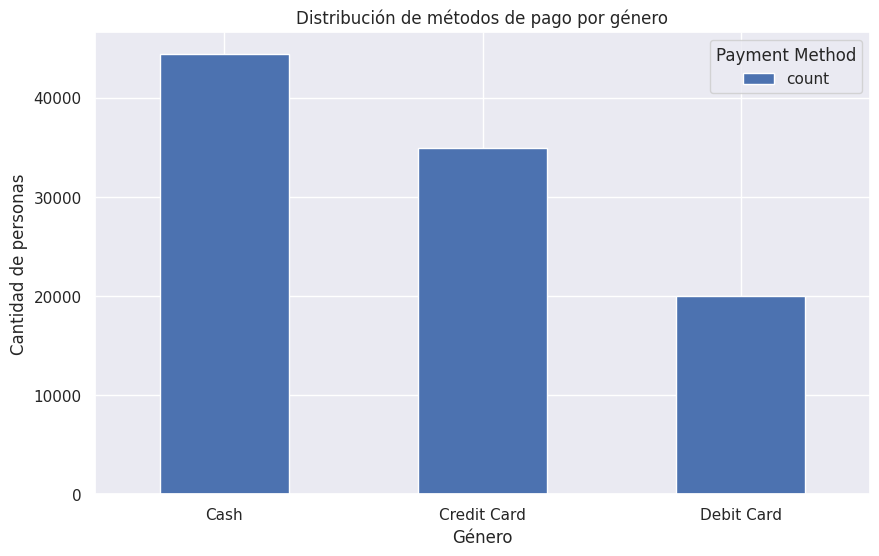

In [315]:
# Tabla cruzada: filas = gender, columnas = payment_method
tabla = df['payment_method'].value_counts()

# Gráfico de barras agrupadas
tabla.plot(kind='bar', figsize=(10,6))
plt.title('Distribución de métodos de pago por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=0)
plt.legend(title='Payment Method')
plt.show()

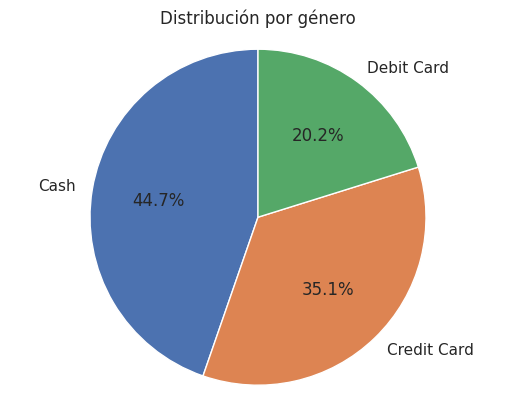

In [316]:
valores = df['payment_method'].value_counts()

# Crear el gráfico circular
plt.pie(valores, labels=valores.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución por género')
plt.axis('equal')  # Hace que el círculo no se vea ovalado
plt.show()

2 Método de pago por genero: aqui se observa que tanto hombres como mujeres utilizan en similares porcentajes los medios de pago, siendo el mas usado el cash( 44,57% mujeres - 44.88% hombres), luego credito (35.34% mujeres - 34.82% hombres) y finalmente debito ( 20.1% mujeres - 20.3% hombres)

In [317]:
porcentaje = (df.groupby('gender')['payment_method'].value_counts(normalize=True)*100).round(2)
conteo = df.groupby('gender')['payment_method'].value_counts()
resultado = pd.DataFrame({'Cantidad': conteo, 'Porcentaje (%)': porcentaje.round(2)})
print(resultado)

                       Cantidad  Porcentaje (%)
gender payment_method                          
Female Cash               26479           44.57
       Credit Card        20994           35.34
       Debit Card         11939           20.10
Male   Cash               17918           44.88
       Credit Card        13904           34.82
       Debit Card          8104           20.30


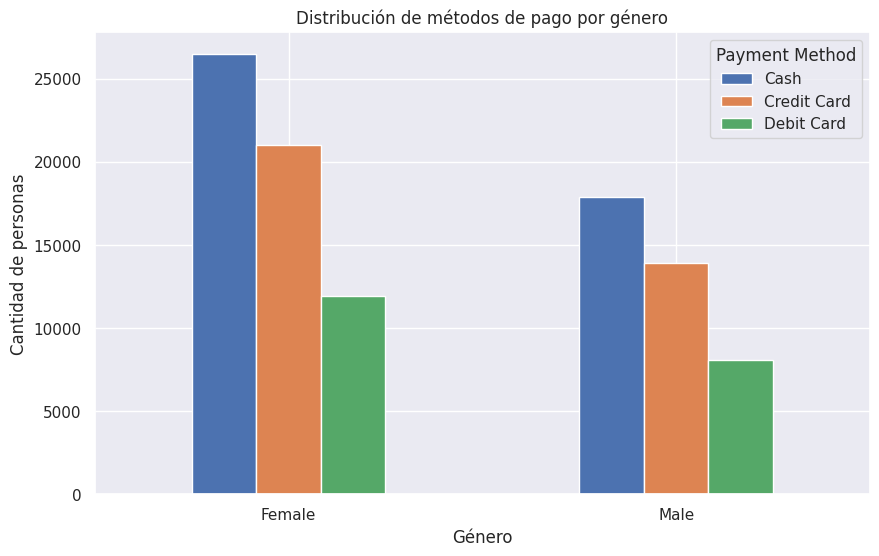

In [318]:
# Tabla cruzada: filas = gender, columnas = payment_method
tabla = pd.crosstab(df['gender'], df['payment_method'])

# Gráfico de barras agrupadas
tabla.plot(kind='bar', figsize=(10,6))
plt.title('Distribución de métodos de pago por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=0)
plt.legend(title='Payment Method')
plt.show()

3 categorización de clientes de acuerdo a su forma de pago (por
edad y género).

In [319]:
(df.groupby('gender')['payment_method'].value_counts(normalize=True)*100).round(2)


gender  payment_method
Female  Cash              44.57
        Credit Card       35.34
        Debit Card        20.10
Male    Cash              44.88
        Credit Card       34.82
        Debit Card        20.30
Name: proportion, dtype: float64

4 Métodos de pagos realizados por el rango etario de 25 a 35 años

In [320]:
print("Métodos de pagos realizados por el rango etario de 25 a 35 años")
df_25_35= df[ (df['age']>=25)& (df['age'] <=35)]
porcentaje = (df_25_35 ['payment_method'].value_counts(normalize=True)*100).round(2)
conteo = df_25_35 ['payment_method'].value_counts()
resultado = pd.DataFrame({'Cantidad': conteo, 'Porcentaje (%)': porcentaje.round(2)})
print(resultado)

Métodos de pagos realizados por el rango etario de 25 a 35 años
                Cantidad  Porcentaje (%)
payment_method                          
Cash                9356           44.78
Credit Card         7274           34.82
Debit Card          4263           20.40


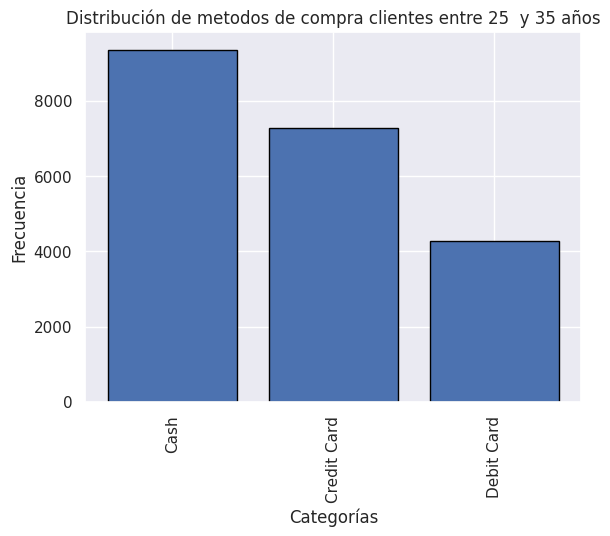

In [321]:
# Contar cuántas veces aparece cada categoría
df_25_35= df[ (df['age']>=25)& (df['age'] <=35)]
valores = df_25_35 ['payment_method'].value_counts()

# Crear el gráfico de barras
plt.bar(valores.index, valores.values, edgecolor='black')
plt.title('Distribución de metodos de compra clientes entre 25  y 35 años')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # gira etiquetas si son largas
plt.show()

5- Métodos de pago más utilizados por las mujeres. Se observa que el 44.57% utiliza cash

In [322]:
print("Métodos de pagos realizados por mujeres")
porcentaje = (df[df['gender']=='Female']['payment_method'].value_counts(normalize=True)*100).round(2)
conteo = (df[df['gender']=='Female']['payment_method'].value_counts()).round(2)
resultado = pd.DataFrame({'Cantidad': conteo, 'Porcentaje (%)': porcentaje.round(2)})
print(resultado)

Métodos de pagos realizados por mujeres
                Cantidad  Porcentaje (%)
payment_method                          
Cash               26479           44.57
Credit Card        20994           35.34
Debit Card         11939           20.10


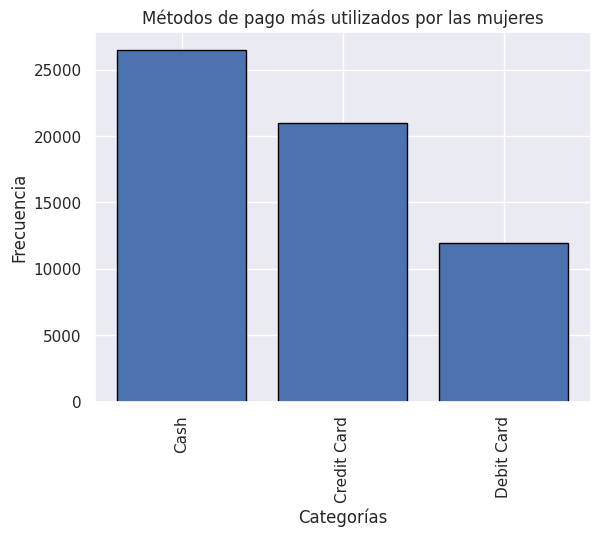

In [323]:
# Contar cuántas veces aparece cada categoría
valores = (df[df['gender']=='Female']['payment_method'].value_counts()).round(2)

# Crear el gráfico de barras
plt.bar(valores.index, valores.values, edgecolor='black')
plt.title('Métodos de pago más utilizados por las mujeres')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # gira etiquetas si son largas
plt.show()

6- Precios por categoría de productos: aqui vemos el listado de categorias de prodcutos y sus precios promedio

In [324]:
(df.groupby('category')['price'].mean()).round(2)

,price
category,
Books,45.56
Clothing,901.12
Cosmetics,122.45
Food & Beverage,15.67
Shoes,1807.28
Souvenir,34.88
Technology,3157.15
Toys,107.75


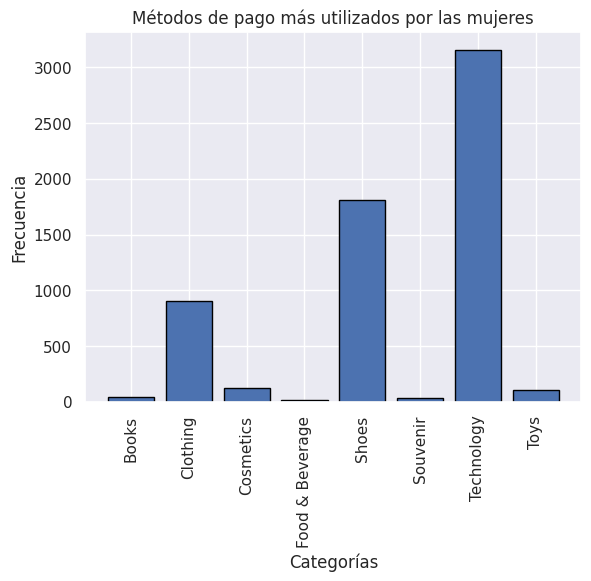

In [325]:
valores= (df.groupby('category')['price'].mean()).round(2)
# Crear el gráfico de barras
plt.bar(valores.index, valores.values, edgecolor='black')
plt.title('Métodos de pago más utilizados por las mujeres')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # gira etiquetas si son largas
plt.show()

# Finalizamos

Finalizamos guardando el archivo con el que si hizo el EDA para que quede un respaldo.


# ETAPA LOAD - datos limpios. Guardamos datos finales para hacer el analisis

In [326]:
df.to_csv('datos_limpios.csv', index=True)

# Fin